We compare the residuals and the uncertainty estimates of all the models by making corner plots for them. This notebook shows how we do this.

In [1]:
import pickle
import numpy as np


# Load all the data
data_locations = {'NN ensemble': 'NN_ensemble',
                  'BNN': 'BNN', 
                  'Dropout NN': 'dropout',
                  'NN$\Delta$NN': 'NNdNN',
                  'GP': 'GP/Matern',
                  'GP$_{NN-\mu}$': 'GPnnm/Matern',
                  'CFGP': 'CFGP/Matern'}
residuals = []
stdevs = []
for method_name, results_location in data_locations.items():
    with open('../../../' + results_location + '/test_predictions.pkl', 'rb') as file_handle:
        residuals_, stdevs_ = pickle.load(file_handle)
    residuals.append(residuals_.reshape(-1))
    stdevs.append(stdevs_.reshape(-1))

# Format the data correctly
residuals = np.vstack(residuals).transpose()
stdevs = np.vstack(stdevs).transpose()

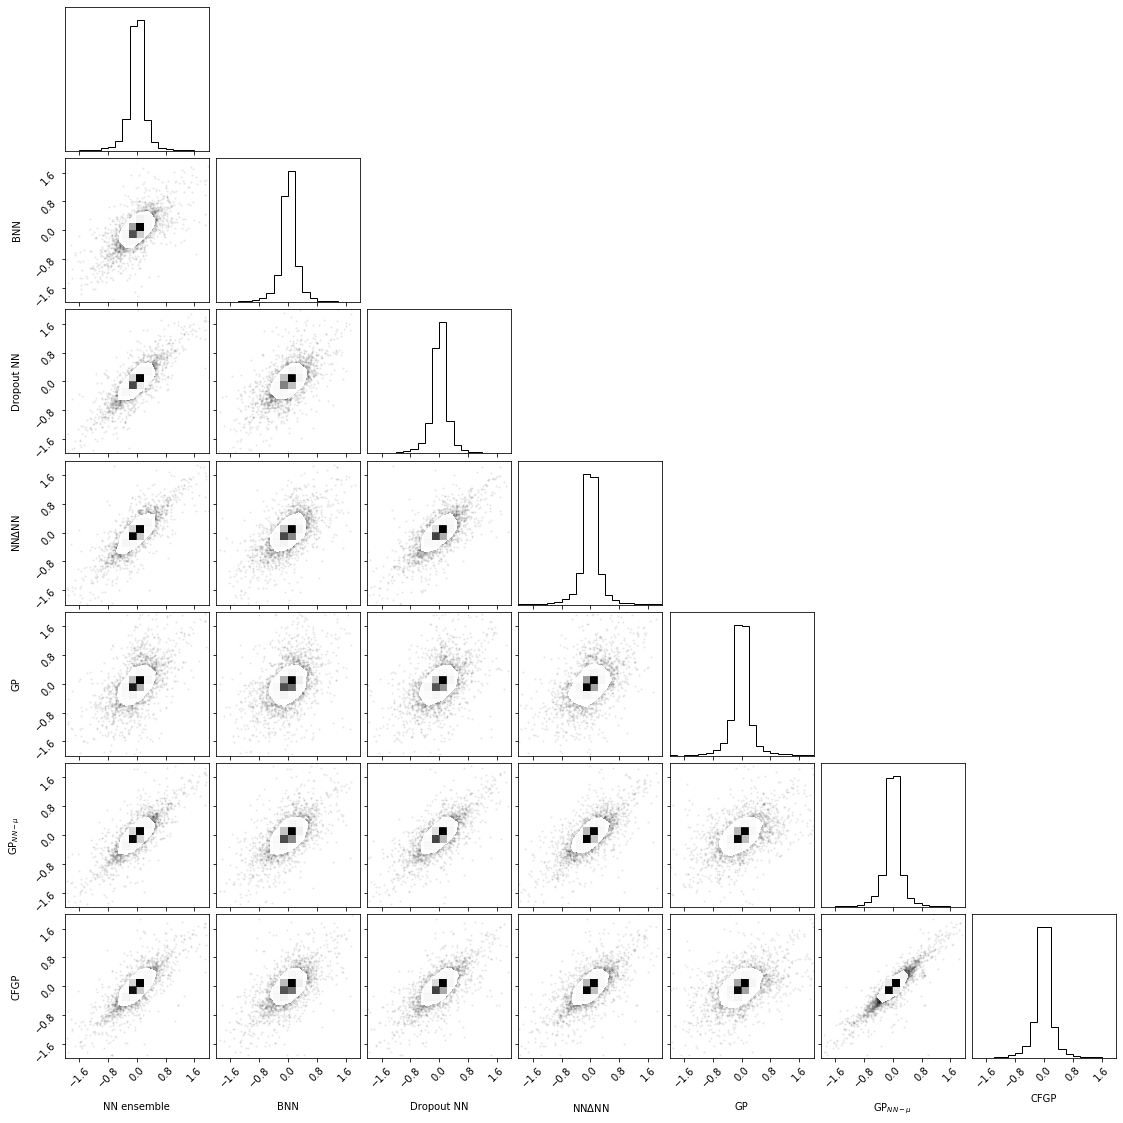

In [8]:
%matplotlib inline
import corner


resid_fig = corner.corner(residuals,
                          labels=list(data_locations.keys()),
                          plot_contours=False,
                          range=[(-2, 2) for _ in range(residuals.shape[1])],
                         )


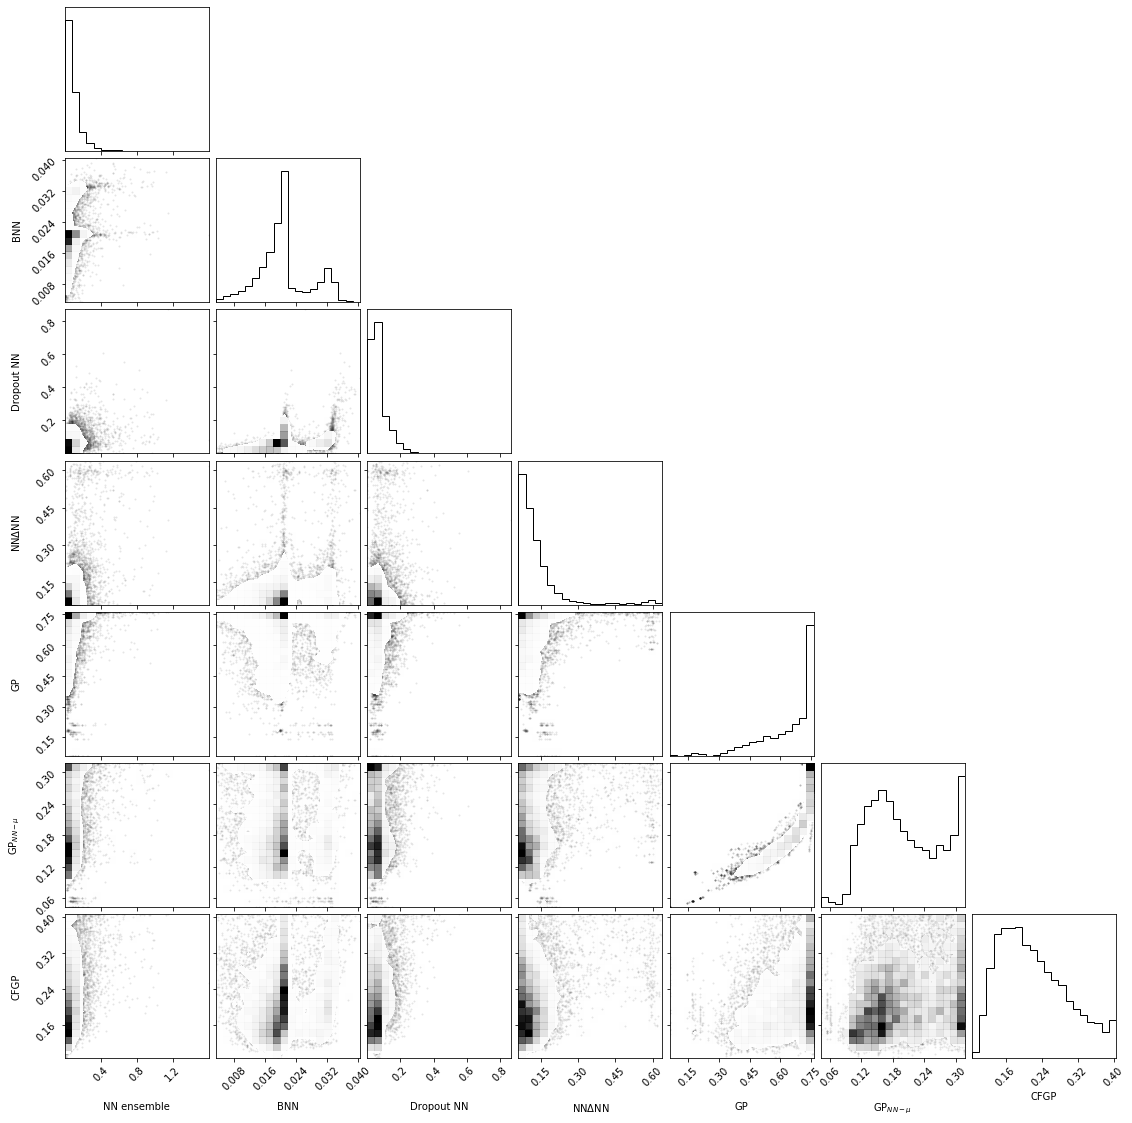

In [9]:
%matplotlib inline
import corner


std_fig = corner.corner(stdevs,
                        labels=list(data_locations.keys()),
                        plot_contours=False,
                        #range=[(0, 2) for _ in range(residuals.shape[1])],
                       )

In [ ]:
# Save
resid_fig.savefig('residuals_corner.pdf', dpi=300, transparent=True, bbox_inches='tight')
std_fig.savefig('sttdevs_corner.pdf', dpi=300, transparent=True, bbox_inches='tight')